<a href="https://colab.research.google.com/github/HaHyunkyung/Seoul_bus_station/blob/main/1_%EA%B5%AC%EB%B3%84_%EB%B2%84%EC%8A%A4%EC%A0%95%EB%A5%98%EC%9E%A5_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

<center>
<img src='https://drive.google.com/uc?id=1Nf_jhqGMXA8eRFVe0PbJXzkk1d6SbZK8' /></br>
</center>

---

# 목차
## 1. 구별 버스정류장 분석 ✔
#### 2. 구별 유동 인구 분석
#### 3. 구별 주민등록인구 분석
#### 4. 구별 업종 등록 분석

In [ ]:
%pip install pandas seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기

In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
bus_station = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [ ]:
bus_station.shape

(1048575, 8)

---

# 2.기본 정보 확인 및 클렌징

In [ ]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [ ]:
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [ ]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [ ]:
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.024011e+07,1.030953e+02,1.010178e+02,2.024012e+07
std,7.455044e+00,1.486801e+02,1.348374e+02,7.455044e+00
min,2.024010e+07,0.000000e+00,0.000000e+00,2.024010e+07
25%,2.024011e+07,1.300000e+01,1.600000e+01,2.024011e+07
50%,2.024011e+07,5.700000e+01,6.200000e+01,2.024012e+07
75%,2.024012e+07,1.370000e+02,1.370000e+02,2.024012e+07
max,2.024013e+07,5.027000e+03,4.352000e+03,2.024013e+07


#### 버스정류장 위치를 구 별로 구분

* 버스정류장 ARS번호의 앞 두자리가 구를 의미

* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록


In [ ]:
bus_station['버스정류장ARS번호']

,버스정류장ARS번호
0,6178
1,22337
2,22336
3,22334
4,22333
...,...
1048570,1837
1048571,1831
1048572,1514
1048573,8454


In [ ]:
# 버스정류장 ARS번호에서 시작하는 앞자리 2개로 '자치구'라는 새로운 컬럼 생성
bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0,stop=-3)
bus_station['자치구']

,자치구
0,6
1,22
2,22
3,22
4,22
...,...
1048570,1
1048571,1
1048572,1
1048573,8


* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [ ]:
# 구 코드를 구 이름으로 변환
bus_station['자치구'] = bus_station['자치구'].map({
    '1': '종로구',
    '2': '중구',
    '3': '용산구',
    '4': '성동구',
    '5': '광진구',
    '6': '동대문구',
    '7': '중랑구',
    '8': '성북구',
    '9': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [ ]:
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129,종로구


#### 결측치 처리하기



In [ ]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옴.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인

bus_station.loc[bus_station['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
699,20240101,441,441번(월암공영차고지~신사사거리),~,월암차고지(종점가상)(00126),0,1,20240104,NaN
1261,20240101,7021,7021번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00076),0,10,20240104,NaN
1337,20240101,7017,7017번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00090),0,10,20240104,NaN
1427,20240101,7016,7016번(은평차고지~상명대),~,은평공영차고지(가상)(00107),0,16,20240104,NaN
3332,20240101,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상)(00076),0,15,20240104,NaN
...,...,...,...,...,...,...,...,...,...
1040945,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(종점가상)(00125),0,35,20240129,NaN
1040953,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(기점가상)(00001),61,12,20240129,NaN
1041836,20240126,N64,N64번(염곡공영차고지~강서공영차고지),~,대흥교통(기점가상)(00001),0,1,20240129,NaN
1042754,20240126,N72,N72중랑 (중랑공영차고지~은평공영차고지),~,중랑공영차고지(기점가상)(00001),3,0,20240129,NaN


In [ ]:
# NaN 값을 제거
bus_station = bus_station.dropna()

In [ ]:
# 컬럼별 NaN 값이 있는지 확인

bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  object
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int64(4), object(5)
memory usage: 73.3+ MB


In [ ]:
# "버스정류장ARS번호" dtype을 정수형(int)으로 변경

bus_station = bus_station.astype({'버스정류장ARS번호':'int64'})

#### 구별로 버스정류장의 개수 확인하기 (서울시)


In [ ]:
# 자치구별 버스정류장 고유값들의 갯수를 출력하여 'bus_station_count' 변수로 저장

bus_station_count = bus_station.groupby('자치구')['버스정류장ARS번호'].nunique()
bus_station_count

,버스정류장ARS번호
자치구,
강남구,501
강동구,367
강북구,410
강서구,567
관악구,468
광진구,280
구로구,486
금천구,347
노원구,496


In [ ]:
# 자치구별 버스정류장 고유값들을 출력하여 'bus_staiton_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력

bus_station_unique = bus_station.groupby('자치구')['버스정류장ARS번호'].unique()
print(bus_station_unique['중랑구'])
np.set_printoptions(threshold=sys.maxsize)

[7142 7136 7138 7465 7440 7438 7432 7433 7435 7434 7008 7007 7336 7335
 7334 7333 7297 7296 7295 7294 7274 7273 7272 7271 7270 7269 7249 7247
 7245 7243 7233 7231 7229 7227 7225 7223 7222 7221 7220 7219 7218 7217
 7216 7199 7197 7195 7194 7145 7144 7131 7129 7117 7006 7005 7004 7003
 7002 7001 7616 7817 7830 7828 7831 7021 7587 7595 7592 7593 7594 7820
 7818 7819 7516 7515 7502 7501 7554 7553 7500 7499 7498 7496 7494 7821
 7829 7832 7043 7045 7060 7057 7054 7058 7020 7014 7011 7013 7015 7016
 7446 7551 7466 7463 7464 7462 7451 7450 7454 7455 7452 7453 7456 7448
 7332 7331 7330 7329 7328 7327 7325 7300 7299 7298 7250 7248 7246 7244
 7242 7232 7230 7228 7226 7224 7211 7210 7209 7208 7207 7206 7205 7204
 7203 7192 7191 7190 7189 7188 7187 7143 7141 7140 7118 7410 7476 7302
 7304 7305 7306 7337 7418 7010 7009 7550 7303 7307 7420 7421 7424 7012
 7178 7180 7181 7182 7183 7184 7185 7186 7111 7112 7113 7114 7115 7116
 7275 7276 7277 7278 7279 7280 7261 7262 7263 7264 7265 7266 7267 7268
 7443 

In [ ]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기(07674 정류장은 서울시 버스정류장이 아님)

bus_station[bus_station['버스정류장ARS번호'] == 7674]

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
43608,20240102,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,1,20240105,중랑구
84449,20240103,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240106,중랑구
206641,20240106,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),3,0,20240109,중랑구
287124,20240108,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,2,20240111,중랑구
327856,20240109,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,4,20240112,중랑구
450342,20240112,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240115,중랑구
612051,20240116,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240119,중랑구
652849,20240117,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240120,중랑구
693641,20240118,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240121,중랑구
814818,20240121,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),2,0,20240124,중랑구


In [ ]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('1.1 bus_station_202401.xlsx')
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (출처:서울열린데이터광장)
# 'only_seoul' 변수로 저장

only_seoul = pd.read_excel('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.1 bus_station_202401.xlsx')

In [ ]:
# 데이터 구조 확인
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS_ID  11263 non-null  int64 
 1   정류소명    11263 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.1+ KB


In [ ]:
# 데이터 확인
only_seoul


,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
11258,25995,우성아파트
11259,25996,우성아파트
11260,25997,조일약국
11261,25998,성내시장


In [ ]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인
only_seoul.loc[only_seoul['ARS_ID'] == 7674]

,ARS_ID,정류소명


In [ ]:
# 'ARS-ID'열 이름을 '버스정류장ARS번호'로 바꾸기

only_seoul.rename(columns={'ARS_ID':'버스정류장ARS번호'}, inplace = True)

In [ ]:
# 'only_seoul'과 'bus_station' 데이터 병합

df = pd.merge(only_seoul, bus_station, how = 'inner', on = '버스정류장ARS번호')

In [ ]:
# 구 별로 버스 정류장의 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구
...,...,...,...,...,...,...,...,...,...,...
957604,25990,암사삼성.현대아파트,20240122,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),80,27,20240125,강동구
957605,25990,암사삼성.현대아파트,20240123,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,29,20240126,강동구
957606,25990,암사삼성.현대아파트,20240124,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,23,20240127,강동구
957607,25990,암사삼성.현대아파트,20240125,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),88,30,20240128,강동구


In [ ]:
# 구 별로 버스 저류장 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장

seoul_bus_station_ARS = df.groupby(by=['자치구'], as_index = False)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS


,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


In [ ]:
# 서울시에 있는 버스정류장 개수 구하기

df['버스정류장ARS번호'].nunique()

10652

#### 구 별로 버스 노선의 개수 확인하기

In [ ]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_staion_line' 변수로 저장

seoul_bus_station_line = df.groupby(by = ['자치구'], as_index=False)['노선번호'].nunique()
seoul_bus_station_line

,자치구,노선번호
0,강남구,98
1,강동구,22
2,강북구,71
3,강서구,51
4,관악구,81
5,광진구,43
6,구로구,80
7,금천구,56
8,노원구,58
9,도봉구,54


#### 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [ ]:
# 자치구별 "승차총승객수","하차총승객수"의 합 구하기, 'seoul_bus_station_sum' 변수로 저장

seoul_bus_station_sum = df.groupby(by=['자치구'], as_index = False)[['승차총승객수','하차총승객수']].sum()
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,6960336,6597087
1,강동구,2515582,2460905
2,강북구,3998077,3858057
3,강서구,3981173,3963283
4,관악구,5862490,5996915
5,광진구,2365355,2382437
6,구로구,4204229,4023135
7,금천구,3133461,3014364
8,노원구,3553485,3497450
9,도봉구,2771076,2695540


#### 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [ ]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,123.257234,116.824633
1,강동구,91.578944,89.588445
2,강북구,126.465395,122.036345
3,강서구,86.932767,86.542122
4,관악구,134.946712,138.040996
5,광진구,107.491706,108.267985
6,구로구,114.700415,109.759781
7,금천구,123.088384,118.410025
8,노원구,83.356439,82.041989
9,도봉구,101.649829,98.878985


#### 데이터 프레임 합치기

In [ ]:
# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')

In [ ]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경

seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

In [ ]:
# 데이터를 합친 결과를 확인합니다.

seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996
5,광진구,274,43,2365355,2382437,107.491706,108.267985
6,구로구,486,80,4204229,4023135,114.700415,109.759781
7,금천구,346,56,3133461,3014364,123.088384,118.410025
8,노원구,495,58,3553485,3497450,83.356439,82.041989
9,도봉구,366,54,2771076,2695540,101.649829,98.878985


In [ ]:
# 해당 데이터프레임을 csv 파일로 저장

seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)

---

# 3.데이터 분석하기
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


#### 데이터 분포 알아보기

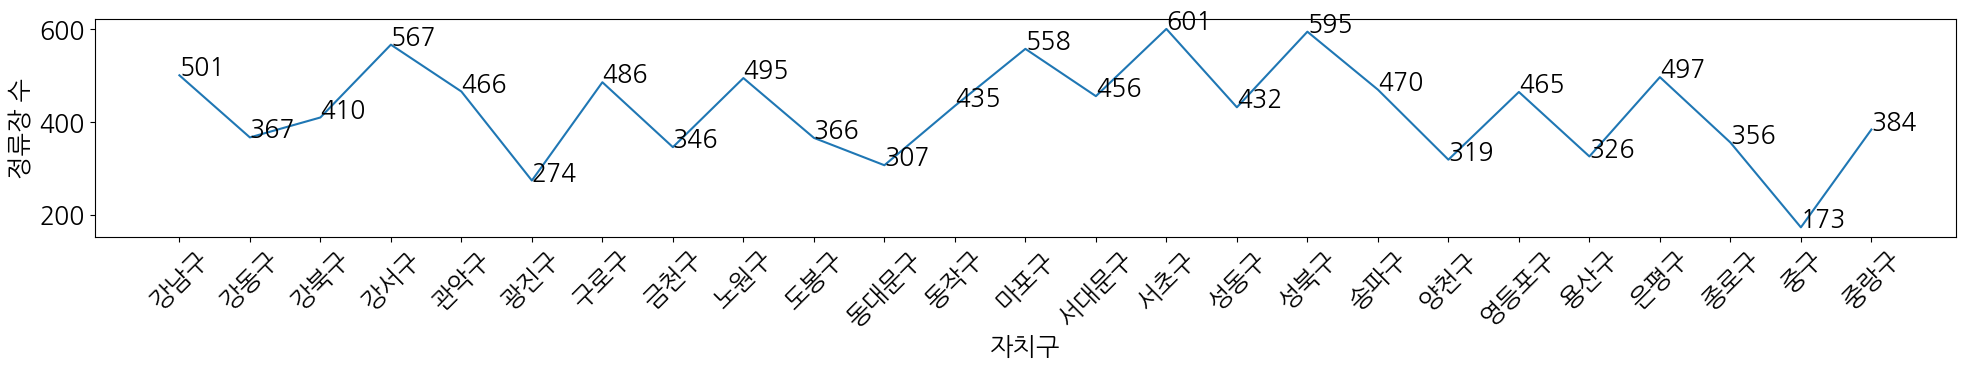

In [ ]:
# 자치구별 정류장 수를 볼 수 있는 그래프

plt.figure(figsize=(20,4))
plt.plot('자치구', '정류장수', data = seoul_bus_station)
plt.xlabel('자치구')
plt.ylabel('정류장 수')
for index, row in seoul_bus_station.iterrows():
    plt.text(row['자치구'], row['정류장수'], str(row['정류장수']))

plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
plt.tight_layout()  # 레이아웃 조정
plt.show()

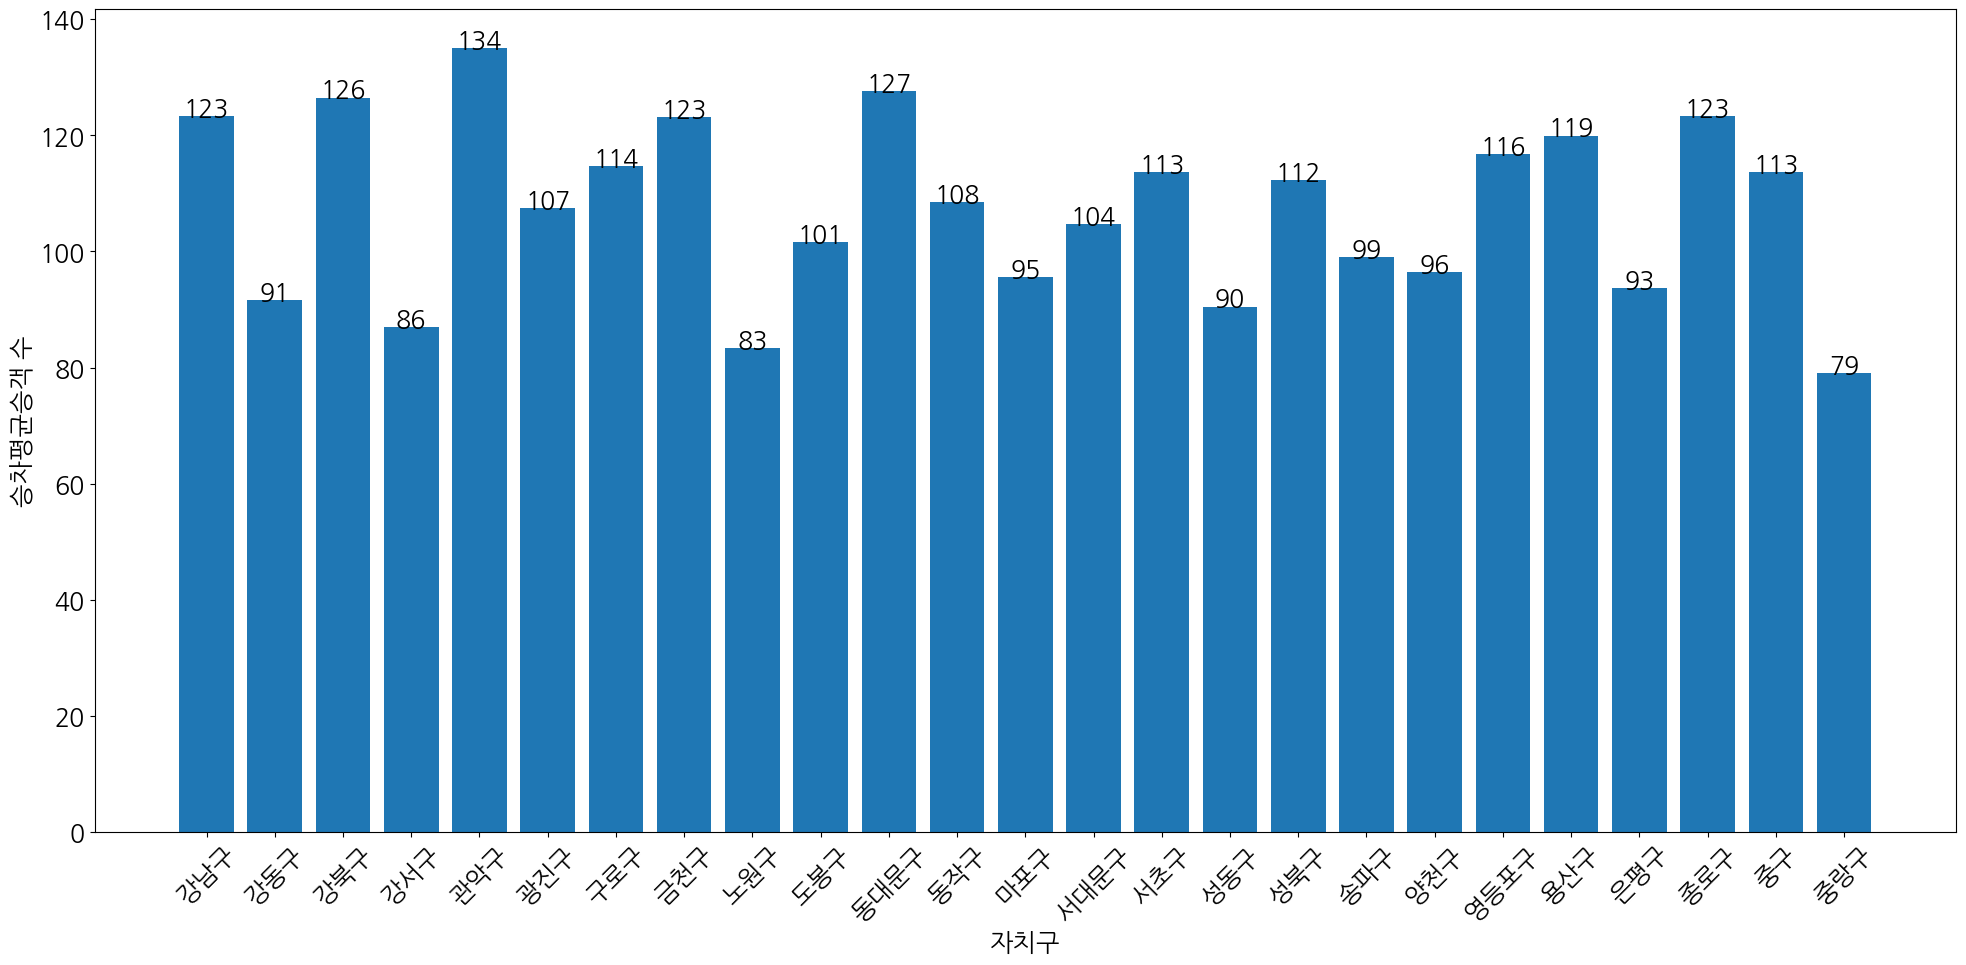

In [ ]:
# 자치구별  승차평균승객 수를 볼 수 있는 그래프

plt.figure(figsize=(20, 10))
plt.bar(seoul_bus_station['자치구'], seoul_bus_station['승차평균승객수'])
plt.xlabel('자치구')
plt.ylabel('승차평균승객 수')

for index, row in seoul_bus_station.iterrows():
    plt.text(row['자치구'], row['승차평균승객수'], str(int(row['승차평균승객수'])), ha='center')  # 정수로 변환하여 표시

plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
plt.tight_layout()  # 레이아웃 조정
plt.show()

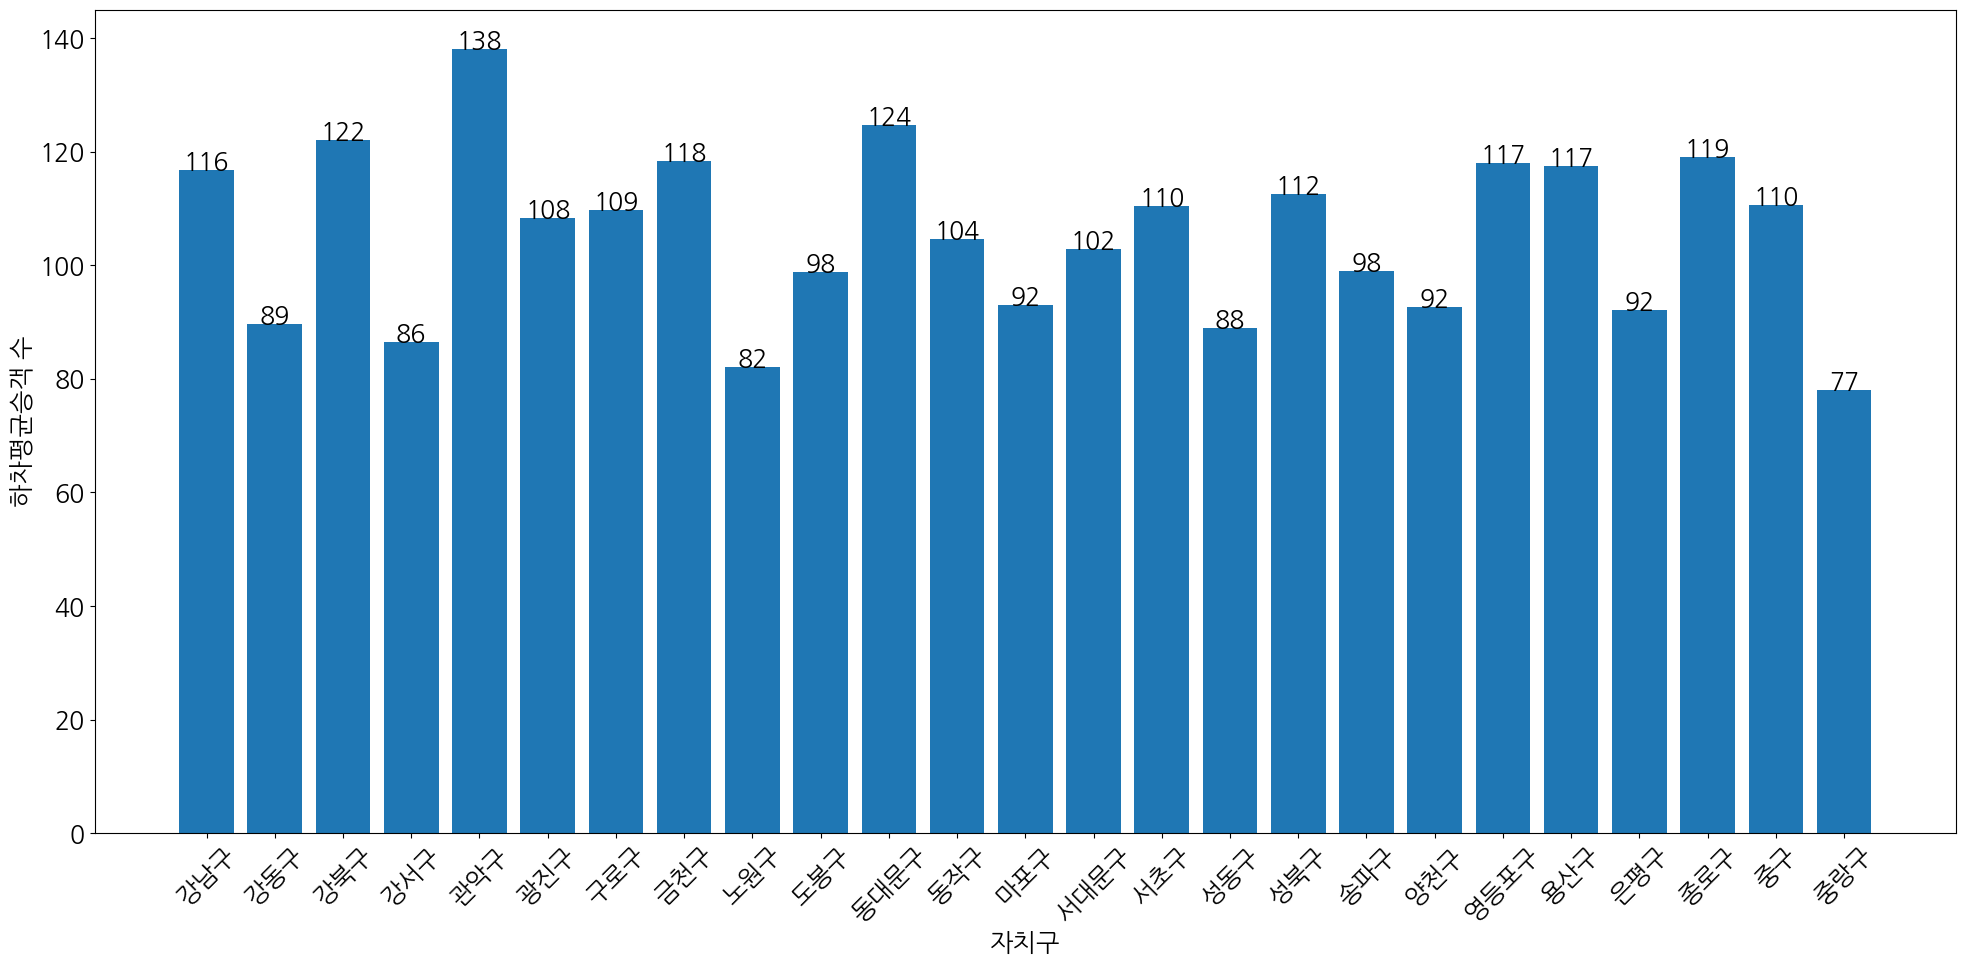

In [ ]:
# 자치구별  하차평균승객 수를 볼 수 있는 그래프

plt.figure(figsize=(20, 10))
plt.bar(seoul_bus_station['자치구'], seoul_bus_station['하차평균승객수'])
plt.xlabel('자치구')
plt.ylabel('하차평균승객 수')

for index, row in seoul_bus_station.iterrows():
    plt.text(row['자치구'], row['하차평균승객수'], str(int(row['하차평균승객수'])), ha='center')  # 정수로 변환하여 표시

plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
plt.tight_layout()  # 레이아웃 조정
plt.show()

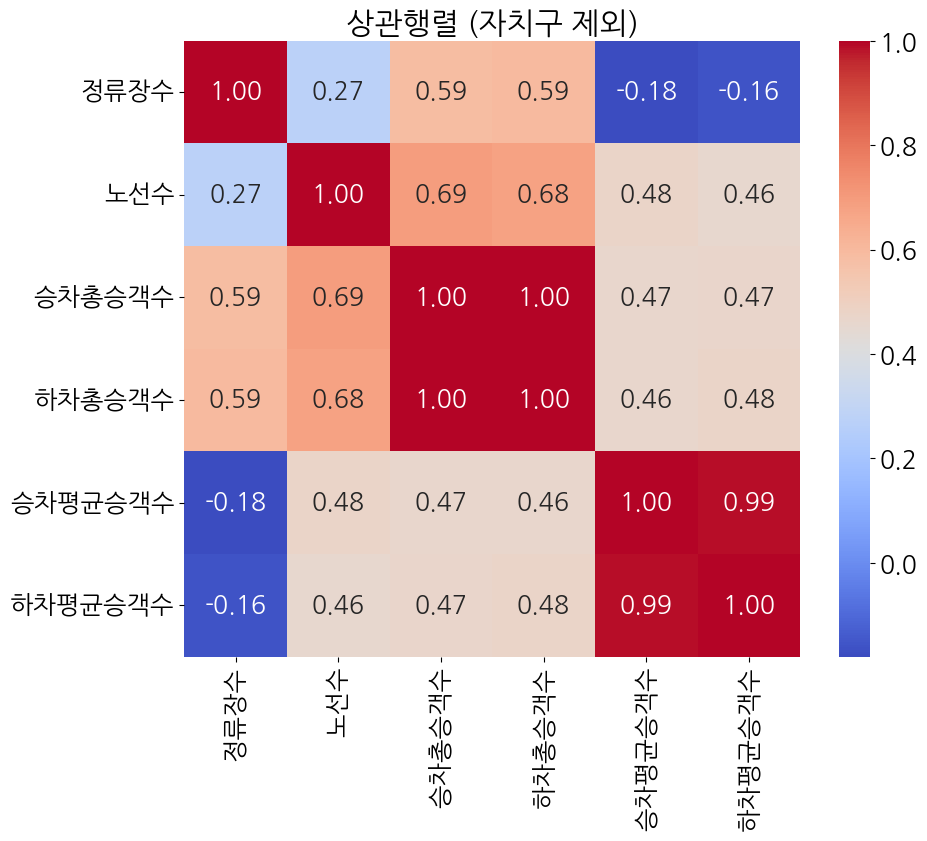

In [ ]:
# '자치구' 열 제거
numeric_data = seoul_bus_station.drop(columns=['자치구'])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# 상관행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('상관행렬 (자치구 제외)')
plt.show()

---



1.   정류장이 가장 많은 자치구 -> 서초구
2.   정류장이 가장 적은 자치구 -> 중구
3.   승차 평균 승객 수가 가장 많은 자치구 -> 관악구
4. 승차 평균 승객 수가 가장 적은 자치구 -> 중랑구
5.   하차 평균 승객 수가 가장 많은 자치구 -> 관악구
6. 하차 평균 승객 수가 가장 적은 자치구 -> 중랑구


## **1. 정류장 수와 승객 수의 관계**

#### **정류장 수와 노선 수:**

정류장 수와 노선 수 간의 상관계수는 0.27로, 양의 상관관계를 나타낸다. 이는 정류장이 많을수록 다양한 노선이 운영될 가능성이 높다는 것을 의미한다. 하지만 정류장이 많다고 해서 반드시 노선 수가 많아지는 것은 아닐 수 있다. 특정 지역에서 노선이 집중될 수 있기 때문이다.

#### **정류장 수와 승차/하차 총 승객 수:**

두 변수 간의 상관계수는 각각 0.59로, 강한 양의 상관관계를 보여준다. 대중교통의 접근성이 높아질수록 더 많은 승객이 이용하게 되는 경향이 있다.

#### **정류장 수와 승차/하차 평균 승객 수:**

정류장 수와 평균 승객 수 간의 상관계수는 약한 음의 상관관계를 보인다. 이는 정류장 수가 많을수록 개별 정류장에서의 평균 승객 수가 낮아질 수 있다는 것을 의미한다. 즉, 많은 정류장들이 분산되어 있을 경우, 특정 정류장에서의 승객 수가 적어질 수 있다. 이는 특정 지역에서 승객들이 주로 이용하는 정류장이 있을 수 있음을 암시한다.

## **2. 노선 수와 승객 수의 관계**

#### **노선 수와 승차/하차 총 승객 수:**

노선 수와 승차 총 승객 수 간의 상관계수는 0.69로, 매우 강한 양의 상관관계를 나타낸다. 노선 수가 많을수록 더 많은 승객들이 이용하게 되는 경향이 있다. 이는 다양한 노선 제공이 승객 유치에 긍정적인 영향을 미친다는 것을 의미한다.

#### **노선 수와 승차/하차 평균 승객 수:**

노선 수와 평균 승객 수 간의 상관계수는 각각 0.48과 0.46으로, 중간 정도의 양의 상관관계를 보입니다. 이는 노선 수가 많으면 평균적으로 각 노선에서 승객 수가 증가할 가능성이 높다는 것을 의미합니다.


## **3. 승차 평균 승객 수와 하차 평균 승객 수**
두 변수 간의 상관계수는 0.99로, 두 평균 승객 수가 거의 동일하게 변동함을 나타낸다. 이는 대중교통의 이용 패턴이 일관적임을 시사한다.

## **결론**
1. 정류장 수와 노선 수는 대중교통 시스템의 효과성을 높이는 중요한 요소임을 알 수 있다.

2. 정류장이 많고 다양한 노선이 제공될수록 더 많은 승객이 이용하게 된다.

3. 하지만 정류장이 과도하게 많을 경우, 개별 정류장에서의 승객 수는 감소할 수 있으므로, 정류장 분포와 노선 계획에 대한 면밀한 검토가 필요하다.